In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Lambda
from keras.layers import Dropout
from keras.layers import SimpleRNN, LSTM
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
model = Sequential()

model.add(LSTM(128, input_shape=(None, 1)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Lambda(lambda x:(-1.25+x*2.5)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total para

In [3]:
def triangle(x):
    x = x - (np.floor(x/(2*np.pi))*2*np.pi)
    normx = x/np.pi
    # print(normx)
    if normx<1:
        return 2*(normx-0.5)
    else:
        return 2*(-normx+1.5)

def triangle_gen(batchsize):
    while True:
        seqlen = np.random.randint(5,10)
        x_train, y_train = list(), list()
        for i in range(batchsize):
            theta = random.uniform(0,2*np.pi)
            sines = np.array([triangle(theta+j*1e-1) for j in range(seqlen)])
            x_train.append(sines.reshape(seqlen,1))
            y_train.append([triangle(theta+seqlen*1e-1)])
        yield np.array(x_train), np.array(y_train)

In [50]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
model.fit_generator(triangle_gen(64), steps_per_epoch=200, epochs=20, verbose=1,
                   validation_data=triangle_gen(32), validation_steps=1)

Epoch 1/20
200/200 [==============================] - 31s 155ms/step - loss: 0.0293 - val_loss: 9.1600e-04
Epoch 2/20
200/200 [==============================] - 8s 42ms/step - loss: 0.0030 - val_loss: 9.3620e-04
Epoch 3/20
200/200 [==============================] - 7s 37ms/step - loss: 0.0020 - val_loss: 2.8365e-04
Epoch 4/20
200/200 [==============================] - 7s 35ms/step - loss: 0.0015 - val_loss: 4.4346e-04
Epoch 5/20
200/200 [==============================] - 6s 32ms/step - loss: 0.0012 - val_loss: 1.7328e-04
Epoch 6/20
200/200 [==============================] - 7s 33ms/step - loss: 0.0011 - val_loss: 2.9175e-04
Epoch 7/20
200/200 [==============================] - 7s 36ms/step - loss: 0.0010 - val_loss: 3.3170e-04
Epoch 8/20
200/200 [==============================] - 7s 36ms/step - loss: 0.0010 - val_loss: 3.7266e-04
Epoch 9/20
200/200 [==============================] - 7s 37ms/step - loss: 9.2297e-04 - val_loss: 3.7952e-04
Epoch 10/20
200/200 [============================

In [52]:
itr = triangle_gen(1)
s=next(itr)[0]
s=s[:,:5,:]
print(s)
y = model.predict(s)
print(y)

[[[0.85875642]
  [0.9224184 ]
  [0.98608037]
  [0.95025765]
  [0.88659567]]]
[[0.8261843]]


In [53]:
np.hstack((s,y.reshape(1,1,1)))
arr = s
for i in range(1100):
    tmp = model.predict(arr[:,-5:,:])
    arr = np.hstack((arr,tmp.reshape(1,1,1)))
    if i%1000==0:
        print(i)

0
1000


In [54]:
arr = arr.reshape((arr.shape[1],))

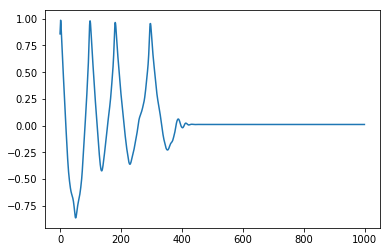

In [55]:
plt.plot(arr[:1000])
plt.show()

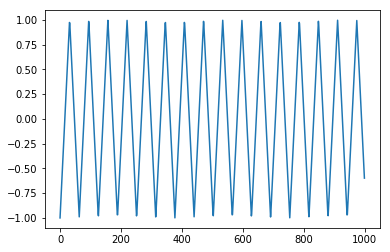

In [56]:
a=np.arange(0,1000*1e-1, 1e-1)
for i in range(len(a)):
    a[i] = triangle(a[i])
plt.plot(a)
plt.show()